In [1]:
import geokit as gk
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
gk.__version__

'1.3.0'

# GEOMETRIES
Within the geometries module, different kind of geometry objects can be defined. Those are: 

1. Point
1. MultiPoint
1. LineString
1. MultiLineString
1. Polygon
1. MultiPolygon

Each object consists of its data (most likely the location) and its spatial reference system SRS from the lection before

## Point
Ponts can be defined with the location information (lat, lon) and the SRS information. The SRS is an SRS-object as created in the section before

In [3]:
aachen_pt = gk.geom.point( (6.083, 52.775), srs=gk.srs.EPSG4326 )
print( type(aachen_pt) )

<class 'osgeo.ogr.Geometry'>


The Object attributes can be obtaine via *object.Get...*

In [4]:
print("X value is: ", aachen_pt.GetX() )
print("Y value is: ", aachen_pt.GetY() )
print("srs is: ",     aachen_pt.GetSpatialReference() )
print("type is: ",     aachen_pt.GetGeometryName() )

X value is:  6.083
Y value is:  52.775
srs is:  GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AXIS["Latitude",NORTH],
    AXIS["Longitude",EAST],
    AUTHORITY["EPSG","4326"]]
type is:  POINT


In [5]:
# Get the buffer around this point
aachen_buffered_area = aachen_pt.Buffer(1)

print( type(aachen_buffered_area) )
print("type is: ",     aachen_buffered_area.GetGeometryName() )

<class 'osgeo.ogr.Geometry'>
type is:  POLYGON


## Line

A line is defined as a polyline and a SRS. A polyline is defined by a number of points with linear connection.

In [6]:
# Make a line
aachen_centered_srs = gk.srs.centeredLAEA(6.083, 50.775)

aachen_line = gk.geom.line(
    [(5.6086412456393614e-11, 1.0605099246605318e-09),
     (5.5966859847770105e-11, 11124.48031893997),
     (5.584717712977507e-11, 22249.12252108337),
     (71432.80781956247, -66262.41755972906),
     (105796.52244980012, 1069.9939140476542),],
    srs=aachen_centered_srs
)

## Draw functions
Geom objects can be drawn within geokit with gk.drawGeoms()

In [7]:
gk.drawGeoms?

### Plot geoms
Plot the Bufferd area, the defined point and the defined line within the latlon coordinate system. The point is in Aachen, which is at around (6,52)

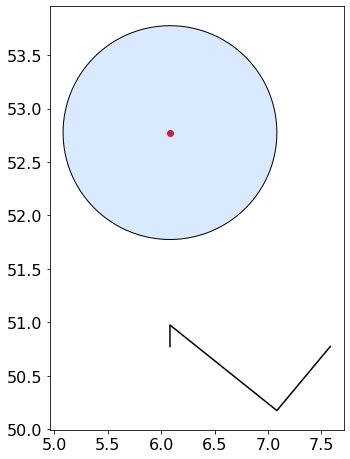

In [8]:
# Draw some geometries
axh = gk.drawGeoms( aachen_buffered_area, figsize=(6,6))#, srs=aachen_centered_srs )
axh = gk.drawGeoms( aachen_pt, ax=axh)#, srs=aachen_centered_srs )
axh = gk.drawGeoms( aachen_line, ax=axh)# , srs=aachen_centered_srs)
plt.show()

### Plot in different SRS
Same plot as above. This time, the SRS is the Aachen centered with equal area projection. 

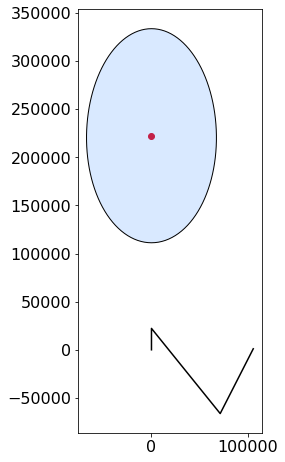

In [9]:
axh = gk.drawGeoms( aachen_buffered_area, figsize=(6,6), srs=aachen_centered_srs )
axh = gk.drawGeoms( aachen_pt, ax=axh, srs=aachen_centered_srs )
axh = gk.drawGeoms( aachen_line, ax=axh, srs=aachen_centered_srs)
plt.show()

## Get Centroid

Calculates the centroid point of each geom object by obj.Centroid().
The result does NOT contain a srs.

In [10]:
ctr_polygon = aachen_buffered_area.Centroid()
print("polygon center - X", ctr_polygon.GetX())
print("polygon center - Y", ctr_polygon.GetY())
print("polygon srs", ctr_polygon.GetSpatialReference())

ctr_line = aachen_line.Centroid()
print("line center - X", ctr_line.GetX())
print("line center - Y", ctr_line.GetY())
print("line srs", ctr_line.GetSpatialReference())

polygon center - X 6.082999999999999
polygon center - Y 52.775000000000034
polygon srs None
line center - X 50860.04492137159
line center - Y -22306.158516041916
line srs None


The srs can be assigend by obj.AssignSpatialReference

In [11]:
## GOTCHYA!
# Apply the old srs
ctr_line.AssignSpatialReference( aachen_line.GetSpatialReference() )
print("line srs", ctr_line.GetSpatialReference())

line srs PROJCS["unknown",
    GEOGCS["unknown",
        DATUM["Unknown based on GRS80 ellipsoid",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]]],
    PROJECTION["Lambert_Azimuthal_Equal_Area"],
    PARAMETER["latitude_of_center",50.775],
    PARAMETER["longitude_of_center",6.083],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH]]


## Boundary
Get the boundary of an object by: obj.Boundary()

In [12]:
# Get a boundary
boundary_polygon = aachen_buffered_area.Boundary()
print(type(boundary_polygon))
print(boundary_polygon.GetGeometryName())

<class 'osgeo.ogr.Geometry'>
LINESTRING


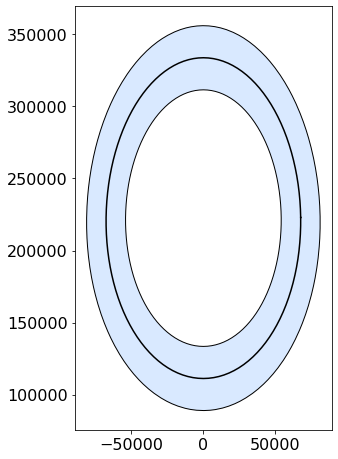

In [13]:
#draw the boundary with a buffer
axh = gk.drawGeoms( boundary_polygon.Buffer(0.2), figsize=(6,6), srs=aachen_centered_srs )
gk.drawGeoms( boundary_polygon, figsize=(6,6), srs=aachen_centered_srs, ax=axh )
plt.show()

## Spatial Relation

1. Contains
1. Crosses
1. Touches
1. Overlaps

[More information here](https://en.wikipedia.org/wiki/Spatial_relation#/media/File:TopologicSpatialRelarions2.png)


In [14]:
# test for containment
print(aachen_buffered_area.Contains( aachen_pt ))
print(aachen_buffered_area.Contains( aachen_line ))
print(boundary_polygon.Buffer(0.2).Contains( aachen_buffered_area ))
print(boundary_polygon.Buffer(0.2).Crosses( aachen_buffered_area ))
print(boundary_polygon.Buffer(0.2).Touches( aachen_buffered_area ))
print(boundary_polygon.Buffer(0.2).Overlaps( aachen_buffered_area ))

True
False
False
False
False
True


## Transform SRS and get points

Get points within a geometry within a choosen SRS:

1. Transform object to another SRS by: gk.geom.transform( [obj1, obj2], toSRS)
1. Extract gk.geom.extractVerticies

In [15]:
# Get Points
boundary_polygon_3857 = gk.geom.transform(boundary_polygon, toSRS=gk.srs.EPSG3857)
gk.geom.extractVerticies(boundary_polygon_3857)[:5,:]

array([[ 788475.95328876, 6941486.97274921],
       [ 788323.39379549, 6931862.13450442],
       [ 787866.13347064, 6922275.17314893],
       [ 787105.42563299, 6912752.18910776],
       [ 786043.35532983, 6903319.01626946]])

In [16]:
boundary_polygon_3857.SimplifyPreserveTopology(10)

<osgeo.ogr.Geometry; proxy of <Swig Object of type 'OGRGeometryShadow *' at 0x0000018CBD9E5B70> >

## Intersect and Union

Example for Intersection and Union of two geometries area1 and area2. 
* Intersection of geoms: 'area1.Intersection(area2)'
* Union of geoms: 'area1.Union(area2)'

Important: All geometry operations need to happen in the same SRS!
If they are not in the same srs, change to one srs: area2 = gk.geom.transform(area2, toSRS=area1.GetSpatialReference())

AxHands(ax=<matplotlib.axes._axes.Axes object at 0x0000018CBDB3D3A0>, handles=[<matplotlib.patches.PathPatch object at 0x0000018CBDB685B0>], cbar=None)

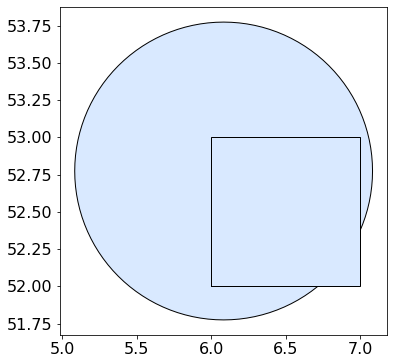

In [17]:
# Geom 1:
axh = gk.drawGeoms(aachen_buffered_area, figsize=(5,5), srs=4326)
# Geom 2:
box = gk.geom.box(6,52,7,53, srs=gk.srs.EPSG4326)
gk.drawGeoms(box, figsize=(5,5), srs=4326, ax=axh)

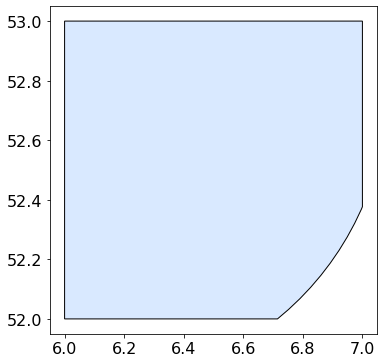

In [18]:
# Intersection of geoms
intersect_geom = aachen_buffered_area.Intersection(box)
axh = gk.drawGeoms(intersect_geom , figsize=(5,5), srs=4326)

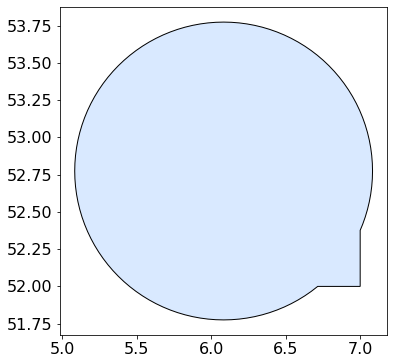

In [19]:
# Union of geoms
unioned_geom = aachen_buffered_area.Union(box)
axh = gk.drawGeoms(unioned_geom, figsize=(5,5), srs=4326)

## Getting areas

In [20]:
box = gk.geom.box(6,52,7,53, srs=gk.srs.EPSG4326)
print("Box area in degrees^2:", box.Area())

Box area in degrees^2: 1.0


In [21]:
ctr = box.Centroid()
box_centered_laea_srs = gk.srs.centeredLAEA( ctr.GetX(), ctr.GetY() )
box.TransformTo(box_centered_laea_srs)
print("Box area in meters^2:", box.Area())

Box area in meters^2: 7556368901.8809
